In [32]:
import numpy as np 
import pandas as pd 
import os
from statsmodels import api as sm
import pylab as py
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime as dt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import seaborn as sns


De los datos obtenidos de PyTrend de Google Trends se seleccionan los datos de las dos principales marcas que se venden. Y se obtienen la media del indice de Google por día del data set

In [33]:

df1 = pd.read_csv('/content/drive/MyDrive/saleforcasting/datos/GT_hist_Apple_04_2019_10_2020.csv')
#df1 = pd.read_csv('/content/drive/MyDrive/saleforcasting/datos/GT_hist_Apple_04_2019_10_2020.csv')

In [34]:
df1.head()

,date,Apple,Mobile Phone,isPartial
0,2019-04-01 00:00:00,91,4,False
1,2019-04-01 01:00:00,88,4,False
2,2019-04-01 02:00:00,88,5,False
3,2019-04-01 03:00:00,82,6,False
4,2019-04-01 04:00:00,64,6,False


In [35]:
df1['date']=pd.to_datetime(df1['date'])

In [36]:
df1['Dia'] = df1['date'].dt.date
df1['Hora'] = df1['date'].dt.time

In [37]:
df1.head()

,date,Apple,Mobile Phone,isPartial,Dia,Hora
0,2019-04-01 00:00:00,91,4,False,2019-04-01,00:00:00
1,2019-04-01 01:00:00,88,4,False,2019-04-01,01:00:00
2,2019-04-01 02:00:00,88,5,False,2019-04-01,02:00:00
3,2019-04-01 03:00:00,82,6,False,2019-04-01,03:00:00
4,2019-04-01 04:00:00,64,6,False,2019-04-01,04:00:00


In [38]:
df1.tail()


,date,Apple,Mobile Phone,isPartial,Dia,Hora
13997,2020-10-31 19:00:00,88,3,False,2020-10-31,19:00:00
13998,2020-10-31 20:00:00,90,2,False,2020-10-31,20:00:00
13999,2020-10-31 21:00:00,87,2,False,2020-10-31,21:00:00
14000,2020-10-31 22:00:00,86,3,False,2020-10-31,22:00:00
14001,2020-10-31 23:00:00,87,2,False,2020-10-31,23:00:00


In [39]:
df1_mean=df1.groupby(['Dia'])[['Apple']].mean()

In [40]:
df1_mean.head()

,Apple
Dia,
2019-04-01,76.416667
2019-04-02,76.500000
2019-04-03,75.083333
2019-04-04,74.500000
2019-04-05,74.500000


In [41]:
df2 = pd.read_csv('/content/drive/MyDrive/saleforcasting/datos/GT_hist_Samsung_04_2019_10_2020.csv')

In [42]:
df2['date']=pd.to_datetime(df2['date'])
df2['Dia'] = df2['date'].dt.date
df2['Hora'] = df2['date'].dt.time

In [43]:
df2.head()

,date,Samsung,isPartial,Dia,Hora
0,2019-04-01 00:00:00,64,False,2019-04-01,00:00:00
1,2019-04-01 01:00:00,61,False,2019-04-01,01:00:00
2,2019-04-01 02:00:00,61,False,2019-04-01,02:00:00
3,2019-04-01 03:00:00,63,False,2019-04-01,03:00:00
4,2019-04-01 04:00:00,73,False,2019-04-01,04:00:00


In [44]:
df2.tail()

,date,Samsung,isPartial,Dia,Hora
13997,2020-10-31 19:00:00,82,False,2020-10-31,19:00:00
13998,2020-10-31 20:00:00,90,False,2020-10-31,20:00:00
13999,2020-10-31 21:00:00,82,False,2020-10-31,21:00:00
14000,2020-10-31 22:00:00,81,False,2020-10-31,22:00:00
14001,2020-10-31 23:00:00,76,False,2020-10-31,23:00:00


In [45]:
df2_mean=df2.groupby(['Dia'])[['Samsung']].mean()

In [46]:
cols2 = ['Dia2','Samsung']
df2_mean = pd.DataFrame(df2_mean , columns=cols2)
cols1 = ['Día','Apple']
df1_mean = pd.DataFrame(df1_mean, columns=cols1)


In [47]:
df3=pd.concat([df1_mean,df2_mean], axis = 1)
df3 = df3.iloc[:, [1,3]]
#df3 = df3[df.columns.difference(to_remove)]
#df3 = df3.drop(df3.columns[1,3], axis=1, inplace = True)
df3.head()
#df3 = a[:,[0,2,4]]

,Apple,Samsung
Dia,,
2019-04-01,76.416667,67.916667
2019-04-02,76.500000,69.416667
2019-04-03,75.083333,70.208333
2019-04-04,74.500000,71.125000
2019-04-05,74.500000,74.166667


De los productos vendidos se obtiene un dataset del importe vendido por día que se une con el dataset de los indices de Google Trends para Apple y Samsung

In [48]:
df = pd.read_csv('/content/drive/MyDrive/saleforcasting/datos/sales_multistore_10_2019_04_2020.csv')

In [49]:
df.head()

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:02:14 UTC,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
1,2019-10-01 00:04:37 UTC,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
2,2019-10-01 00:07:07 UTC,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
3,2019-10-01 00:09:26 UTC,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
4,2019-10-01 00:09:54 UTC,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707926 entries, 0 to 5707925
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   product_id     int64  
 2   category_id    int64  
 3   category_code  object 
 4   brand          object 
 5   price          float64
 6   user_id        int64  
 7   user_session   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 348.4+ MB


In [52]:
df['event_time'] = pd.to_datetime(df['event_time'])
df['Dia3'] = pd.to_datetime(df['event_time'], format = '%Y-%m-%d')
df['Dia3'] = df['Dia3'].dt.date
df = df[['Dia3', 'price']]
df.head(3)

,Dia3,price
0,2019-10-01,130.76
1,2019-10-01,642.69
2,2019-10-01,54.42


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707926 entries, 0 to 5707925
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Dia3    object 
 1   price   float64
dtypes: float64(1), object(1)
memory usage: 87.1+ MB


In [54]:
df.fillna

<bound method DataFrame.fillna of                Dia3   price
0        2019-10-01  130.76
1        2019-10-01  642.69
2        2019-10-01   54.42
3        2019-10-01  189.91
4        2019-10-01  161.98
...             ...     ...
5707921  2020-04-30   18.02
5707922  2020-04-30  952.15
5707923  2020-04-30  807.20
5707924  2020-04-30   10.53
5707925  2020-04-30  353.77

[5707926 rows x 2 columns]>

In [55]:
df4 = df.groupby(['Dia3'], as_index= True)[['price']].sum().reset_index()
df4.head(3)

,Dia3,price
0,2019-10-01,5611920.00
1,2019-10-02,5550036.48
2,2019-10-03,5536184.77


In [56]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dia3    211 non-null    object 
 1   price   211 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [57]:
df5 = pd.merge(df4,df3, how= 'left', left_on= ['Dia3'], right_on= ['Dia'] )
df5.rename(columns={'price':'Sales'},inplace=True)

In [58]:
df5.head(3)

,Dia3,Sales,Apple,Samsung
0,2019-10-01,5611920.00,72.416667,74.875000
1,2019-10-02,5550036.48,70.250000,74.458333
2,2019-10-03,5536184.77,69.708333,74.125000


In [59]:
df5.tail()

,Dia3,Sales,Apple,Samsung
206,2020-04-26,8240988.05,84.083333,40.250000
207,2020-04-27,8594728.09,75.280000,74.320000
208,2020-04-28,8392245.16,76.125000,77.666667
209,2020-04-29,8410214.49,74.875000,77.500000
210,2020-04-30,8582556.13,77.041667,79.583333


In [ ]:
df5.to_csv('/content/drive/MyDrive/saleforcasting/datos/sales.csv')

Ahora se realiza la predicción de las ventas con prophet

In [60]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
# data analysis
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
sales = pd.read_csv('/content/drive/MyDrive/saleforcasting/datos/sales.csv')
sales = sales.iloc[:, [1,2,3,4]]
sales.head()

,Dia3,Sales,Apple,Samsung
0,2019-10-01,5611920.00,72.416667,74.875000
1,2019-10-02,5550036.48,70.250000,74.458333
2,2019-10-03,5536184.77,69.708333,74.125000
3,2019-10-04,7714341.92,72.708333,75.666667
4,2019-10-05,6499835.95,80.250000,82.291667


In [63]:
daily_total_qty = sales[['Dia3', 'Sales']].rename(
    columns={'Dia3': 'ds',
             'Sales': 'y'})

daily_total_qty.head()

,ds,y
0,2019-10-01,5611920.00
1,2019-10-02,5550036.48
2,2019-10-03,5536184.77
3,2019-10-04,7714341.92
4,2019-10-05,6499835.95


In [64]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
import warnings

In [65]:
model = Prophet()
model.fit(daily_total_qty)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Se proyecta un año más de predicción de ventas

In [66]:
future = model.make_future_dataframe(periods=365, freq='D')
future.tail()

,ds
571,2021-04-26
572,2021-04-27
573,2021-04-28
574,2021-04-29
575,2021-04-30


In [67]:
forecast = model.predict(future)
forecast.head()
forecast[['ds', 'trend', 'weekly', 'yhat']]

,ds,trend,weekly,yhat
0,2019-10-01,6.843755e+06,-589771.847825,6.253983e+06
1,2019-10-02,6.874174e+06,-166001.990454,6.708172e+06
2,2019-10-03,6.904592e+06,-172850.339980,6.731742e+06
3,2019-10-04,6.935011e+06,-81429.862416,6.853581e+06
4,2019-10-05,6.965430e+06,-121457.093419,6.843973e+06
...,...,...,...,...
571,2021-04-26,-6.505323e+06,123770.235377,-6.381553e+06
572,2021-04-27,-6.545054e+06,-589771.847826,-7.134825e+06
573,2021-04-28,-6.584784e+06,-166001.990454,-6.750786e+06
574,2021-04-29,-6.624514e+06,-172850.339980,-6.797365e+06


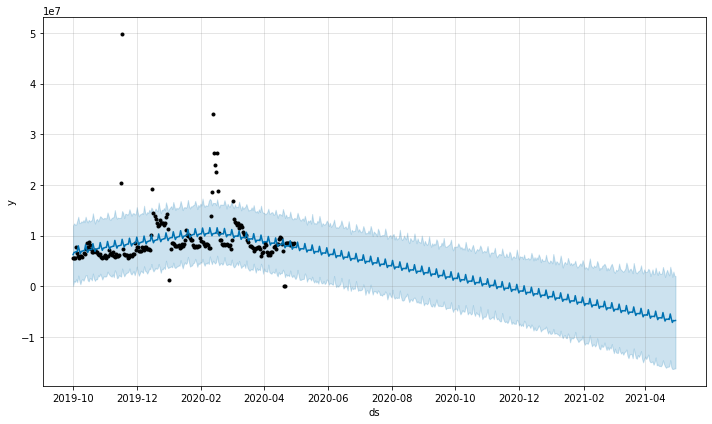

In [68]:
fig = model.plot(forecast)

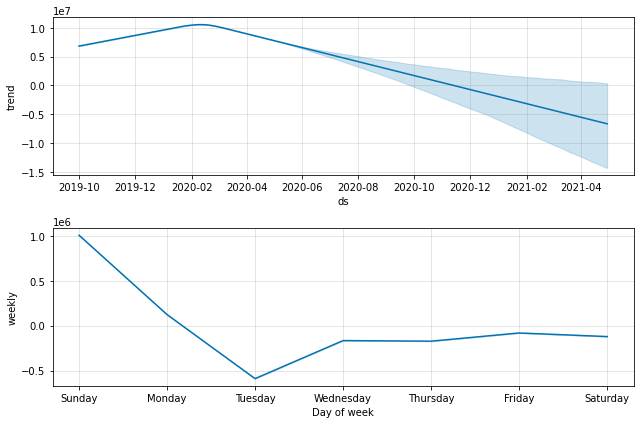

In [69]:
fig = model.plot_components(forecast)

Proyección de forma interactiva

In [70]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [71]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)

Ajuste de la tendencia

Se indican cuando se producen cambios en los datos

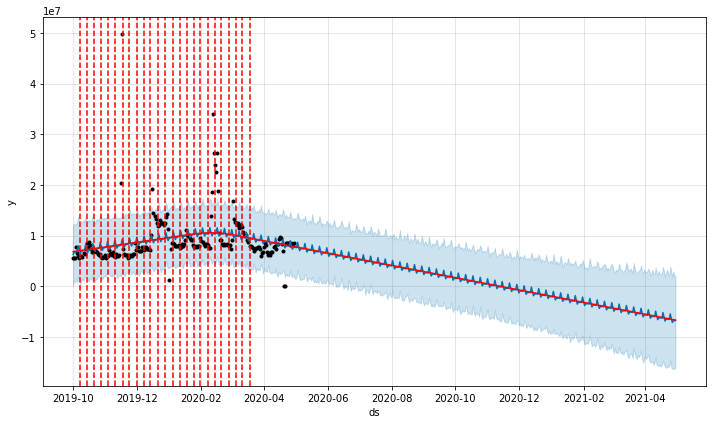

In [72]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast, threshold=0)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


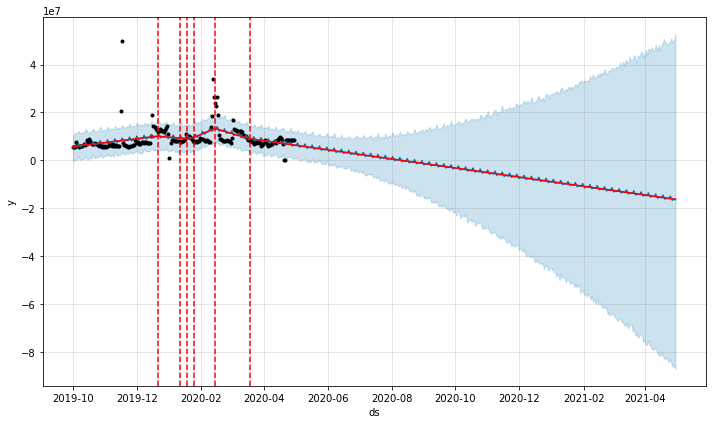

In [73]:
# fitting model
model_tuning_trend = Prophet(
    n_changepoints=25, # default = 25
    changepoint_range=0.8, # default = 0.8
    changepoint_prior_scale=0.5 # default = 0.05
    )
model_tuning_trend.fit(daily_total_qty)

# forecasting
future = model_tuning_trend.make_future_dataframe(periods=365, freq='D')
forecast = model_tuning_trend.predict(future)

# visualize

fig = model_tuning_trend.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_tuning_trend, forecast)

Vamos a utilizar ver si no hay una estacionalidad regular ya que se ve que la variación es muy grande con la imagen anterior en la posible proyección




INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


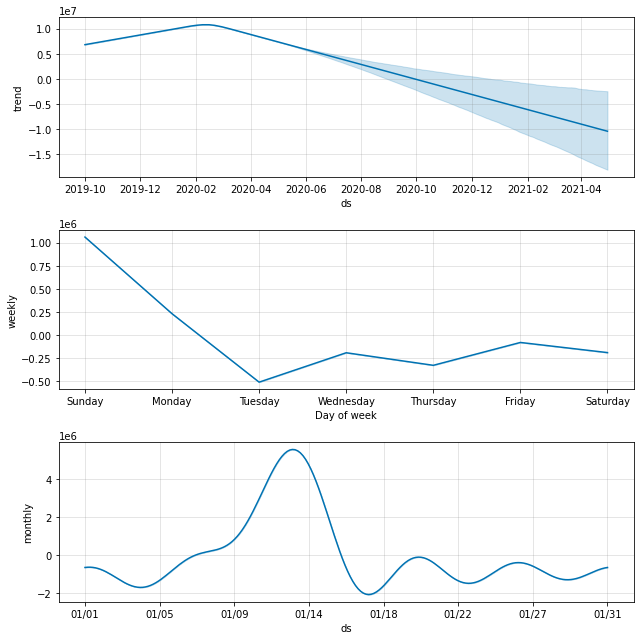

In [74]:
# fitting model
model_custom_seasonality = Prophet(
    yearly_seasonality=False ## remove seasonality
    )
## add seasonality
model_custom_seasonality.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_custom_seasonality.fit(daily_total_qty)

# forecasting
future = model_custom_seasonality.make_future_dataframe(periods=365, freq='D')
forecast = model_custom_seasonality.predict(future)

# visualize
fig = model_custom_seasonality.plot_components(forecast)

In [75]:
plot_plotly(model, forecast)

Ahora voy a añadir regresores nuevos al modelo para saber si me aporta más información. Estos regresores son los indices de Google Trends para Apple y Samsung. Y voy a ver como afecta a su indice en Google Trends para el caso de Apple


In [76]:
daily_sales_31 = sales
daily_sales_31.head()

,Dia3,Sales,Apple,Samsung
0,2019-10-01,5611920.00,72.416667,74.875000
1,2019-10-02,5550036.48,70.250000,74.458333
2,2019-10-03,5536184.77,69.708333,74.125000
3,2019-10-04,7714341.92,72.708333,75.666667
4,2019-10-05,6499835.95,80.250000,82.291667


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


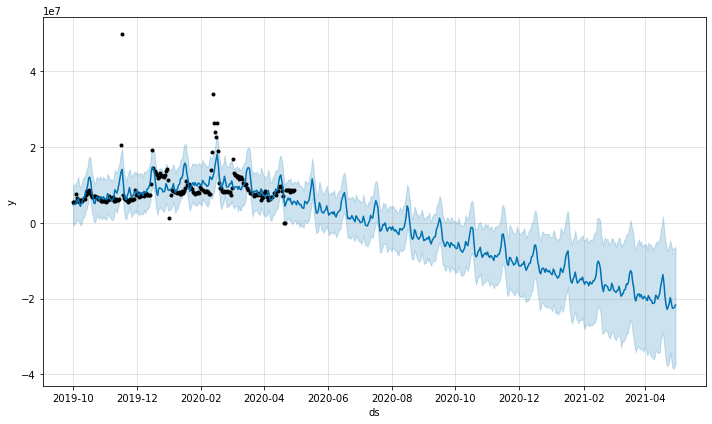

In [77]:
# fitting model
model_total_qty = Prophet(
    n_changepoints=20, 
    changepoint_range=0.9, 
    changepoint_prior_scale=0.25, 
    weekly_seasonality=5, 
    )
## add monthly seasonality
model_total_qty.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_total_qty.fit(daily_total_qty)

# forecasting
future = model_total_qty.make_future_dataframe(periods=365, freq='D')
forecast_total_qty = model_total_qty.predict(future)

# visualize
fig = model_total_qty.plot(forecast_total_qty)

In [78]:
forecasted_total_qty = forecast_total_qty[['ds', 'yhat']].tail(365) \
                        .rename(columns={'yhat': 'total_qty'})
forecasted_total_qty

,ds,total_qty
211,2020-05-01,5.374143e+06
212,2020-05-02,4.747016e+06
213,2020-05-03,5.836905e+06
214,2020-05-04,5.257458e+06
215,2020-05-05,4.769954e+06
...,...,...
571,2021-04-26,-2.100216e+07
572,2021-04-27,-2.248453e+07
573,2021-04-28,-2.250549e+07
574,2021-04-29,-2.234841e+07


In [79]:
actual_total_qty = daily_total_qty.rename(columns={'y': 'total_qty'})
actual_total_qty

,ds,total_qty
0,2019-10-01,5611920.00
1,2019-10-02,5550036.48
2,2019-10-03,5536184.77
3,2019-10-04,7714341.92
4,2019-10-05,6499835.95
...,...,...
206,2020-04-26,8240988.05
207,2020-04-27,8594728.09
208,2020-04-28,8392245.16
209,2020-04-29,8410214.49


In [80]:
future_with_regressor = pd.concat([actual_total_qty, forecasted_total_qty])
future_with_regressor

,ds,total_qty
0,2019-10-01,5.611920e+06
1,2019-10-02,5.550036e+06
2,2019-10-03,5.536185e+06
3,2019-10-04,7.714342e+06
4,2019-10-05,6.499836e+06
...,...,...
571,2021-04-26 00:00:00,-2.100216e+07
572,2021-04-27 00:00:00,-2.248453e+07
573,2021-04-28 00:00:00,-2.250549e+07
574,2021-04-29 00:00:00,-2.234841e+07


In [81]:
daily_total_revenue = daily_sales_31[['Dia3', 'Apple', 'Sales']].rename(
    columns={'Dia3': 'ds',
             'Apple': 'y',
             'Sales': 'total_qty'})

daily_total_revenue.head()

,ds,y,total_qty
0,2019-10-01,72.416667,5611920.00
1,2019-10-02,70.250000,5550036.48
2,2019-10-03,69.708333,5536184.77
3,2019-10-04,72.708333,7714341.92
4,2019-10-05,80.250000,6499835.95


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


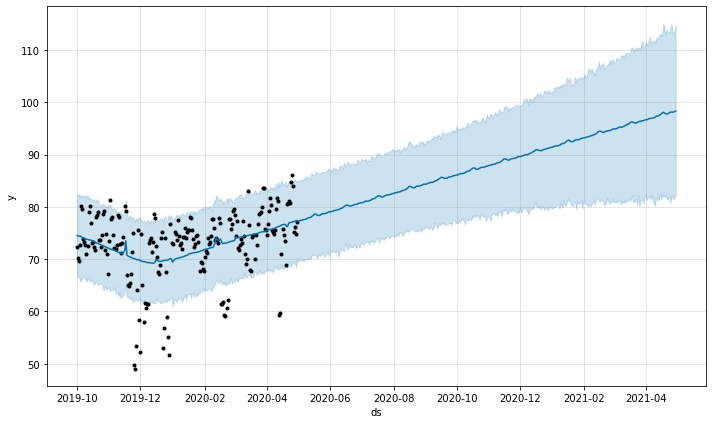

In [82]:
# fitting model
model_total_revenue = Prophet(
    weekly_seasonality=False
    )
## add regressor
model_total_revenue.add_regressor('total_qty')
model_total_revenue.fit(daily_total_revenue)

# forecasting

forecast_total_revenue = model_total_revenue.predict(future_with_regressor)

# visualize
fig = model_total_revenue.plot(forecast_total_revenue)

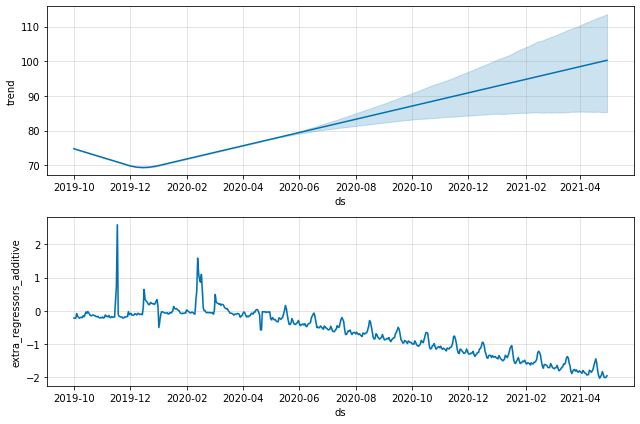

In [83]:
fig = model_total_revenue.plot_components(forecast_total_revenue)

Vamos a analizar la perfomance  del modelo y se establece los datos de test los datos del mes de marzo y abril

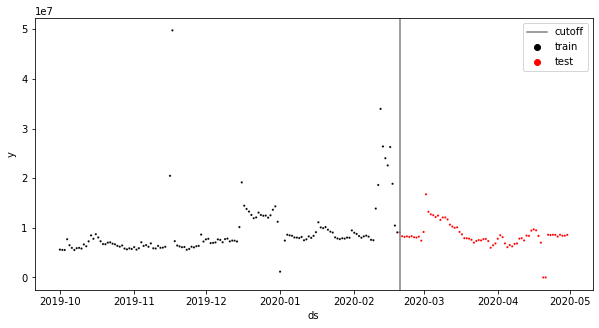

In [84]:
cutoff = pd.to_datetime('2020-2-20')
daily_total_qty['ds'] = pd.to_datetime (daily_total_qty['ds'])
daily_total_qty['type'] = daily_total_qty['ds'].apply(lambda date: 'train' if date < cutoff else 'test')

plt.figure(figsize=(10, 5))
sns.scatterplot(x='ds', y='y', hue='type', s=5,
                palette=['black', 'red'],
                data=daily_total_qty)
plt.axvline(x=cutoff, color='gray', label='cutoff')
plt.legend()
plt.show()

In [85]:
train = daily_total_qty[daily_total_qty['ds'] < cutoff]
test = daily_total_qty[daily_total_qty['ds'] >= cutoff]

print(f'Train size: {train.shape}')
print(f'Test size: {test.shape}')

Train size: (140, 3)
Test size: (71, 3)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


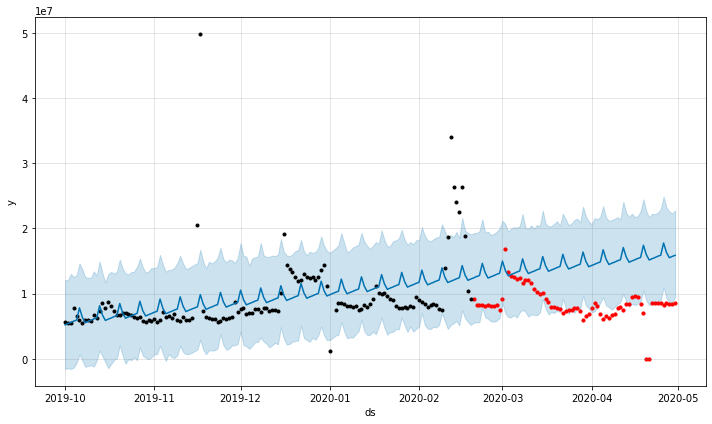

In [86]:
# fitting model
model_final = Prophet(
    weekly_seasonality=True)
model_final.add_seasonality(name='weekly', period=30.5, fourier_order=2) 
model_final.fit(train) 

# forecasting
future_final = model_final.make_future_dataframe(periods=71, freq='D') # Como son solo los datos de abril se pone 71 periodos porque son los dias desde el 20 de febrero
forecast_final = model_final.predict(future_final)

# visualize
fig = model_final.plot(forecast_final)
plt.scatter(x=test['ds'], y=test['y'], s=10, color='red')
plt.show()

Evaluación de las metricas

In [87]:
from sklearn.metrics import mean_squared_log_error
forecast_train = forecast_final[forecast_final['ds'] < cutoff]
train_rmsle = mean_squared_log_error(y_true=train['y'],
                                     y_pred=forecast_train['yhat']) ** 0.5
train_rmsle

0.38227369379163895

In [88]:
forecast_test = forecast_final[forecast_final['ds'] >= cutoff]
test_rmsle = mean_squared_log_error(y_true=test['y'],
                                    y_pred=forecast_test['yhat']) ** 0.5
test_rmsle

1.3734002396307765

Vamos a intentarlo con NeuralProphet

In [89]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
from neuralprophet import NeuralProphet

In [137]:
from neuralprophet import set_random_seed
set_random_seed(0)

In [138]:
# model = NeuralProphet() if you're using default variables below.
model = NeuralProphet(
    growth="linear",  # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints=None, # list of dates that may include change points (None -> automatic )
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,     # Dimension of hidden layers of AR-Net
    learning_rate=None,
    epochs=100,
    loss_func="Huber",
    normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True
)

In [182]:
df6 = df5[['Dia3', 'Sales']].rename(
    columns={'Dia3': 'ds',
             'Sales': 'y',
            })

In [140]:
metrics = model.fit(df6,freq="D")
future = model.make_future_dataframe(df6, periods=90,n_historic_predictions=len(df6))
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.578% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True

  0%|          | 0/112 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.40E-01, min: 1.00E-01
INFO:NP.utils_torch:lr-range-test results: steep: 9.40E-01, min: 1.00E-01


  0%|          | 0/112 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.80E-01, min: 8.30E-02
INFO:NP.utils_torch:lr-range-test results: steep: 7.80E-01, min: 8.30E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.18E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 4.18E-01
Epoch[100/100]: 100%|██████████| 100/100 [00:03<00:00, 33.33it/s, SmoothL1Loss=0.0293, MAE=2.23e+6, RMSE=3.69e+6, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.578% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.003% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.003% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is eq

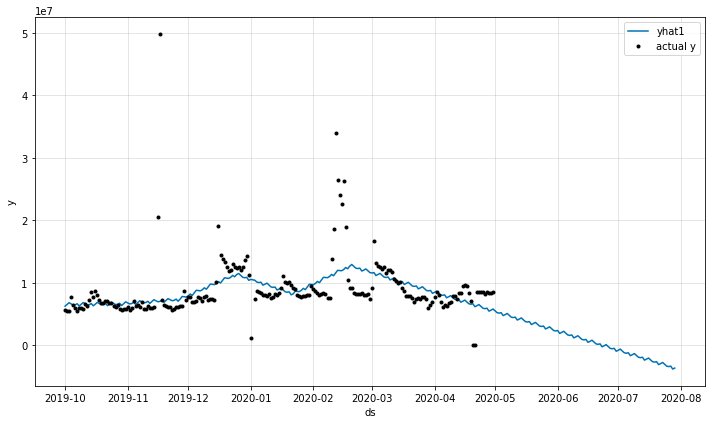

In [141]:
forecasts_plot = model.plot(forecast)

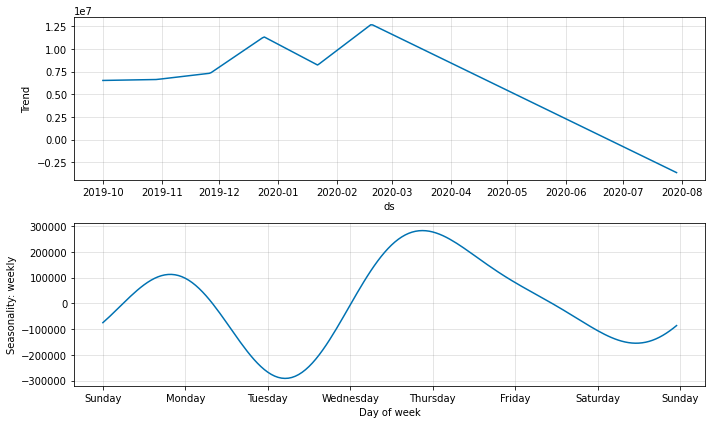

In [142]:
fig_comp = model.plot_components(forecast)

In [143]:
metrics.head(3)

,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.398776,1.151351e+07,1.696806e+07,0.0
1,0.329987,1.013093e+07,1.488468e+07,0.0
2,0.250320,8.516382e+06,1.263160e+07,0.0


Ajustes sobre la tendencia para ajustarnos a una tendencia cambiante

In [144]:
m2 = NeuralProphet(
    n_changepoints=30,
    changepoints_range=0.90,
    trend_reg=1,
)
metrics2 = m2.fit(df6, freq="D")
forecast2 = m2.predict(df6)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO:NP.config:Note: Trend changepoint regularization is experimental.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.578% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily sea

  0%|          | 0/112 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.21E-01, min: 6.08E-03
INFO:NP.utils_torch:lr-range-test results: steep: 1.21E-01, min: 6.08E-03


  0%|          | 0/112 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.00E-01, min: 8.83E-03
INFO:NP.utils_torch:lr-range-test results: steep: 1.00E-01, min: 8.83E-03
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.06E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 1.06E-01
Epoch[356/356]: 100%|██████████| 356/356 [00:08<00:00, 39.97it/s, SmoothL1Loss=0.0275, MAE=2.17e+6, RMSE=3.49e+6, RegLoss=0.0929]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.578% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.578% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency 

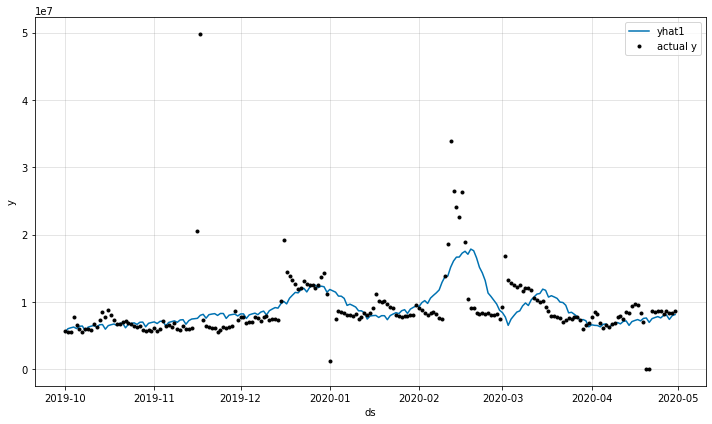

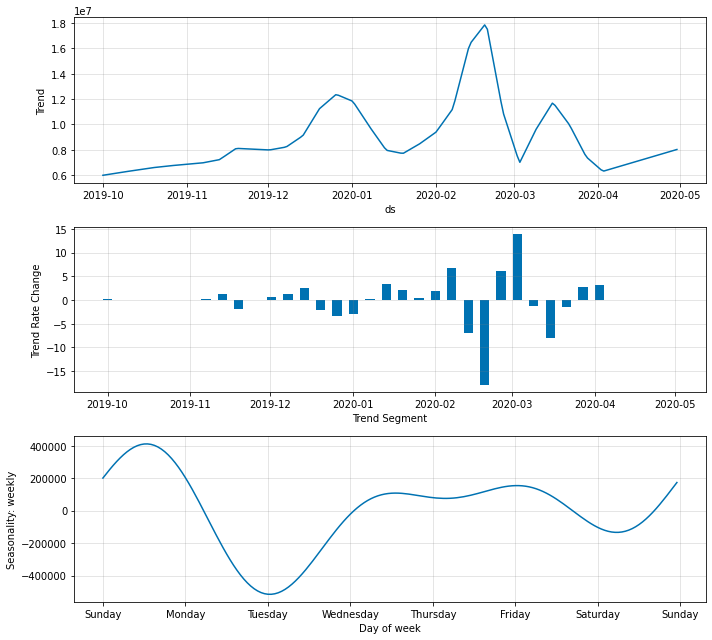

In [145]:
fig1 = m2.plot(forecast2)
fig2 = m2.plot_parameters()

In [146]:
metrics2.head(3)

,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.488916,1.485923e+07,1.730311e+07,0.0
1,0.464548,1.433212e+07,1.702323e+07,0.0
2,0.443866,1.384861e+07,1.651228e+07,0.0


Validación cruzada

In [147]:
from neuralprophet.benchmark import Dataset, NeuralProphetModel, SimpleExperiment, CrossValidationExperiment

INFO - (NP.benchmark.<module>) - Note: The benchmarking framework is not properly documented.Please help us by reporting any bugs and adding documentation.Multiprocessing is not covered by tests and may break on your device.If you use multiprocessing, only run one benchmark per python script.
INFO:NP.benchmark:Note: The benchmarking framework is not properly documented.Please help us by reporting any bugs and adding documentation.Multiprocessing is not covered by tests and may break on your device.If you use multiprocessing, only run one benchmark per python script.


In [149]:
ts = Dataset(df6, name = "sales", freq = "MS")
params = {"seasonality_mode": "multiplicative"}
exp_cv = CrossValidationExperiment(
    model_class=NeuralProphetModel,
    params=params,
    data=ts,
    metrics=["MASE", "RMSE"],
    test_percentage=10,
    num_folds=3,
    fold_overlap_pct=0,
  )
result_train, result_test = exp_cv.run()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.973% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.973% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch

  0%|          | 0/109 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.00E-01, min: 5.62E+00
INFO:NP.utils_torch:lr-range-test results: steep: 1.00E-01, min: 5.62E+00


  0%|          | 0/109 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.00E-01, min: 1.00E+00
INFO:NP.utils_torch:lr-range-test results: steep: 1.00E-01, min: 1.00E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.00E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 1.00E-01
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.973% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.973% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.973% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.973% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 95.238% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 9

  0%|          | 0/110 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.12E-02, min: 1.07E-01
INFO:NP.utils_torch:lr-range-test results: steep: 4.12E-02, min: 1.07E-01


  0%|          | 0/110 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.23E+00, min: 8.81E-02
INFO:NP.utils_torch:lr-range-test results: steep: 2.23E+00, min: 8.81E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.09E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 2.09E-01
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.225% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.225% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.225% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.225% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 95.238% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 9

  0%|          | 0/111 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.66E-02, min: 4.24E-01
INFO:NP.utils_torch:lr-range-test results: steep: 3.66E-02, min: 4.24E-01


  0%|          | 0/111 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.66E-02, min: 5.12E-01
INFO:NP.utils_torch:lr-range-test results: steep: 3.66E-02, min: 5.12E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.12E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 5.12E-02
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.421% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.421% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.421% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.421% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 95.238% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 9

In [151]:
result_train

{'data': 'sales',
 'model': 'NeuralProphet',
 'params': "{'seasonality_mode': 'multiplicative'}",
 'MASE': [1.4868617, 1.3720698, 1.4982313],
 'RMSE': [4956099.5, 4592177.5, 4365455.5]}

In [150]:
# result_train
result_test

{'data': 'sales',
 'model': 'NeuralProphet',
 'params': "{'seasonality_mode': 'multiplicative'}",
 'MASE': [2.4770577, 1.3016971, 2.6549833],
 'RMSE': [4552620.5, 2403509.8, 3918067.0]}

Pronóstico con una red neuronal

In [307]:
m3 = NeuralProphet(
   growth="linear",  # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints=None, # list of dates that may include change points (None -> automatic )
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=5,     # Dimension of hidden layers of AR-Net
    learning_rate=0.001,
    epochs=1000,
    loss_func="Huber",
    normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True,
)
df_train, df_test = m3.split_df(df6,freq='D', valid_p = 0.1)

metrics = m3.fit(df_train, freq='H',validation_df=df_test, progress='plot')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.578% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.421% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.421% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with ye

In [308]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
999,0.03063,2.482859e+06,3.857772e+06,0.0,0.011779,1899229.375,2680566.0


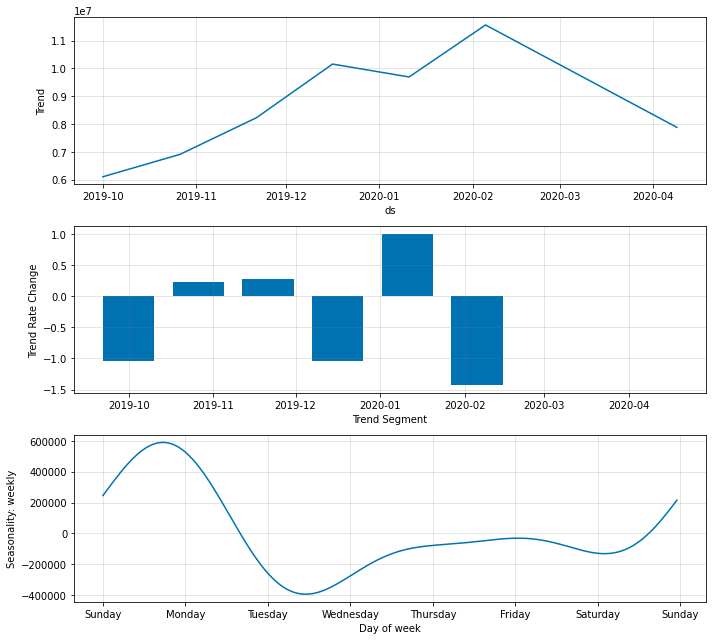

In [309]:
fig = m3.plot_parameters()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 95.238% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 95.238% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 95.238% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 95.238% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency D


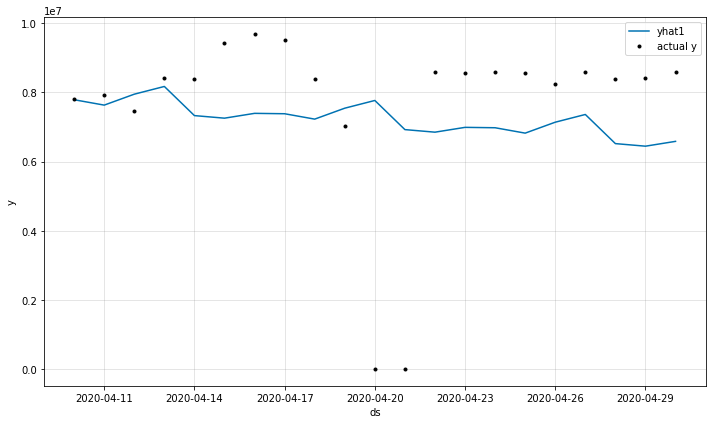

In [310]:
#m4 = m3.highlight_nth_step_ahead_of_each_forecast(1)
forecast = m3.predict(df_test)
fig = m3.plot(forecast)

In [311]:
forecast.head()

,ds,y,yhat1,residual1,trend,season_weekly
0,2020-04-10,7813142.32,7789711.0,-23431.32,7820851.0,-31140.587891
1,2020-04-11,7913340.83,7634191.0,-279149.83,7763031.0,-128839.789062
2,2020-04-12,7461631.15,7950142.0,488510.85,7705212.0,244930.187500
3,2020-04-13,8427518.13,8173264.0,-254254.13,7647391.0,525873.187500
4,2020-04-14,8377284.82,7331243.0,-1046041.82,7589572.0,-258328.671875


In [292]:
forecast.tail()

,ds,y,yhat1,residual1,trend,season_weekly,season_daily
16,2020-04-26,8240988.05,9593204.0,1352215.95,13926000.0,315255.500000,-4648052.0
17,2020-04-27,8594728.09,9843991.0,1249262.91,13926000.0,566043.375000,-4648052.0
18,2020-04-28,8392245.16,8988985.0,596739.84,13926000.0,-288962.843750,-4648052.0
19,2020-04-29,8410214.49,8885635.0,475420.51,13926000.0,-392312.968750,-4648052.0
20,2020-04-30,8582556.13,9142056.0,559499.87,13926000.0,-135892.296875,-4648052.0


In [357]:
df6.head()

,ds,y
0,2019-10-01,5611920.00
1,2019-10-02,5550036.48
2,2019-10-03,5536184.77
3,2019-10-04,7714341.92
4,2019-10-05,6499835.95


In [367]:
dates = pd.date_range(start='2020-05-01',periods=31,freq='D')
dates

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-05-30', '2020-05-31'],
              dtype='datetime64[ns]', freq='D')

In [370]:
dates = pd.to_datetime(dates, format = '%Y-%m-%d')

In [375]:
dates

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-05-30', '2020-05-31'],
              dtype='datetime64[ns]', freq='D')

In [377]:

dates = pd.DataFrame(dates, columns = ['ds'])
dates['y'] = 0
forecast = m3.predict(dates)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.774% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.774% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency H is different than major frequency D


In [378]:
forecast.tail()

,ds,y,yhat1,residual1,trend,season_weekly
26,2020-05-27,0,4828576.0,4828576.0,5103317.0,-274740.468750
27,2020-05-28,0,4967743.5,4967743.5,5045497.5,-77753.843750
28,2020-05-29,0,4956537.0,4956537.0,4987677.0,-31140.587891
29,2020-05-30,0,4801018.0,4801018.0,4929858.0,-128839.789062
30,2020-05-31,0,5116967.5,5116967.5,4872037.5,244930.187500
